# Chapter 4: CNN
## Ex2: Fashion_mnist
* Cho dữ liệu fashion_mnist chứa 70.000 hình ảnh là các sản phẩm thời trang.
* Chia dữ liệu thành 2 bộ là train (60.000 hình) và test (10.000 hình ảnh)
* Áp dụng CNN để nhận biết hình ảnh số là sản phẩm nào
* Dựa vào summary của mô hình để tính số lượng tham số.
* Chú ý: nên dùng EarlyStopping, ModelCheckpoint để lưu lại model sau các lần thực thi để
tránh khi bị ngắt đột ngột phải thực hiện lại từ đầu

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/My\ Drive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_3/Chapter4

/content/drive/My Drive/LDS8_K275_ONLINE_NGUYENTHIKIMHOANG/Week_3/Chapter4


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model, to_categorical
from IPython.display import Image
from tensorflow.keras.models import load_model

In [9]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

0


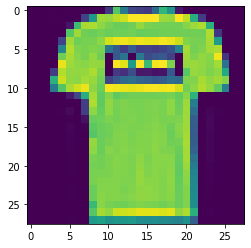

In [12]:
plt.imshow(X_train[1])
print(y_train[1])

9


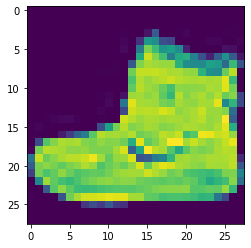

In [13]:
plt.imshow(X_train[0])
print(y_train[0])

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [16]:
# create model
model = Sequential()
# add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Tao va du doan tiep tuc voi ANN
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
# output
model.add(Dense(10, activation = 'softmax'))

In [17]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
callbacks = [EarlyStopping(monitor='val_loss',patience=10),
             ModelCheckpoint('model_mnist_checkpoint_new.h5',save_best_only=True)]

In [19]:
model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=256,
          callbacks = callbacks)

Epoch 1/50
235/235 [==============================] - 15s 15ms/step - loss: 2.3110 - accuracy: 0.6819 - val_loss: 0.5031 - val_accuracy: 0.8194
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.5219 - accuracy: 0.8082 - val_loss: 0.4265 - val_accuracy: 0.8478
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.4564 - accuracy: 0.8317 - val_loss: 0.3891 - val_accuracy: 0.8549
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.4209 - accuracy: 0.8445 - val_loss: 0.3616 - val_accuracy: 0.8645
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3928 - accuracy: 0.8540 - val_loss: 0.3363 - val_accuracy: 0.8794
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3714 - accuracy: 0.8622 - val_loss: 0.3221 - val_accuracy: 0.8826
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.3520 - accuracy: 0.8699 - val_loss: 0.3131 - val_accuracy: 0.887

In [26]:
# Crates a HDF5 file
model.save('fashion_mnist_model_CNN_new.h5')
print('Save!!!')

Save!!!


In [27]:
# show predictions for the first 5 images in the test set
result = model.predict(X_test[:5])

In [28]:
result

array([[5.2433111e-20, 2.1103946e-24, 6.1959042e-27, 5.1074272e-29,
        9.9467716e-24, 8.5945642e-09, 4.4619487e-24, 1.5959603e-08,
        6.5318299e-28, 1.0000000e+00],
       [1.3007197e-07, 5.3724693e-17, 9.9972814e-01, 3.5888046e-12,
        2.5430172e-06, 5.1160150e-24, 2.6923502e-04, 4.7444249e-25,
        1.6315306e-14, 1.1698294e-25],
       [2.9932067e-35, 1.0000000e+00, 7.0834517e-27, 2.6065463e-24,
        1.5662316e-24, 0.0000000e+00, 4.7451671e-27, 0.0000000e+00,
        9.0425616e-30, 0.0000000e+00],
       [4.5269419e-25, 1.0000000e+00, 1.1491687e-21, 6.0139918e-18,
        6.3201851e-18, 7.5117104e-32, 2.8245539e-20, 3.4613443e-38,
        9.5110656e-24, 0.0000000e+00],
       [2.1797395e-03, 9.8979351e-14, 1.6994327e-03, 1.4603845e-06,
        3.3746671e-04, 3.7602154e-18, 9.9578190e-01, 2.6555024e-24,
        2.5557719e-11, 2.1989610e-18]], dtype=float32)

In [29]:
result.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [30]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

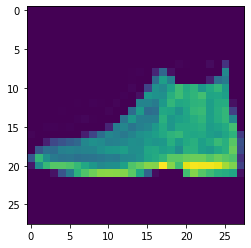

In [33]:
X_test = X_test.reshape(10000,28,28)
plt.imshow(X_test[0])

In [34]:
del model

In [35]:
classifier = load_model('fashion_mnist_model_CNN_new.h5')

In [36]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0